# Lab3: Clustering with K-means, K-means++ and Kmedioids

## Overview
In this lab, you will learn how to implement and analyze the **K-means**, **K-means++**  and **Kmedioids** clustering algorithms on two different real-world datasets:

- **MNIST Digits** (10 handwritten digits (image)).  
- **CIFAR-10 dataset** (different categories of imagenet style objects).  

You will compare the performance of **K-means**,  **K-means++** and **Kmedioids**.

Note that everywhere you need to use random_state = 42 where ever needed for Kmeans, Kmeans++ and Kmedioids for reproducibility, if you set this to anotehr value **you will not get full score**.


In [ ]:
# Install dependencies if needed
!pip install datasets scikit-learn matplotlib numpy seaborn pandas
!pip install kmedoids

from datasets import load_dataset
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import kmedoids
import seaborn as sns
import pandas as pd

from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    confusion_matrix
)
from collections import Counter
from sklearn.manifold import TSNE



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 28.8 MB/s eta 0:00:00


## Dataset MNIST (HandWritten Digits)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

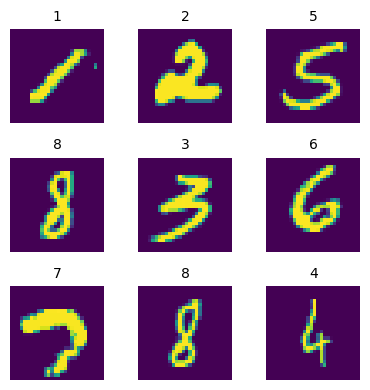

In [ ]:
# 1. Load MNIST dataset

dataset = load_dataset("mnist", split="train[:5000]")
dataset = dataset.shuffle(seed=42)

fig, axes = plt.subplots(3, 3, figsize=(4, 4))

for i, ax in enumerate(axes.flat):
    img = dataset[i]["image"]
    label = dataset.features["label"].int2str(dataset[i]["label"])
    ax.imshow(img)
    ax.set_title(label, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# 2. Preprocess: resize + flatten images

X = np.array([np.array(img.resize((64, 64))).flatten()
              for img in dataset["image"]], dtype=np.float32)
X = X / 255.0  # normalize to [0, 1]

print("Data shape:", X.shape)  # (N, 64*64*3)


# Reduce to 50 dimensions (you can tune this number)
pca = PCA(n_components=786, random_state=42)
X = pca.fit_transform(X)


# 3. Extract labels

y = np.array(dataset["label"])
label_names = dataset.features["label"].names

print("Labels shape:", y.shape)

# 4. Count unique clusters

unique_labels, counts = np.unique(y, return_counts=True)
n_classes = len(unique_labels)

print("\nNumber of unique clusters (classes):", n_classes)
print("Allclasses:")
for i in range(n_classes):
    print(f"{unique_labels[i]} -> {label_names[unique_labels[i]]} ({counts[i]} samples)")


Data shape: (5000, 4096)
Labels shape: (5000,)

Number of unique clusters (classes): 10
Allclasses:
0 -> 0 (479 samples)
1 -> 1 (563 samples)
2 -> 2 (488 samples)
3 -> 3 (493 samples)
4 -> 4 (535 samples)
5 -> 5 (434 samples)
6 -> 6 (501 samples)
7 -> 7 (550 samples)
8 -> 8 (462 samples)
9 -> 9 (495 samples)


In [ ]:
#This is a helper function that will help you visualize the top 5 datapoints in each cluster
def show_closest_images(X, dataset, centroids, labels, title, num_images=5):
    n_clusters = len(centroids)
    fig, axes = plt.subplots(n_clusters, num_images, figsize=(1.2*num_images, 1.2*n_clusters))


    # If only 1 cluster, fix axes shape
    if n_clusters == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, centroid in enumerate(centroids):
        distances = np.linalg.norm(X - centroid, axis=1)
        cluster_indices = np.where(labels == i)[0]

        if len(cluster_indices) == 0:
            continue

        closest_indices = cluster_indices[np.argsort(distances[cluster_indices])[:num_images]]

        for j, idx in enumerate(closest_indices):
            try:
                img = dataset[int(idx)]["image"]
            except:
                img = dataset[int(idx)]["img"]
            label_name = dataset.features["label"].int2str(dataset[int(idx)]["label"])

            axes[i, j].imshow(img)
            axes[i, j].axis("off")

            axes[i, j].text(0.5, -0.15, label_name,
                            size=7, ha="center", va="top", transform=axes[i, j].transAxes)

            if j == 0:
                axes[i, j].set_title(f"Cluster {i}", fontsize=9)

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()


[link text](https://)# [TODO] Implement KMeans for MNIST (2 points)

## Instructions

In this section, you will implement **K-means** using the **sklearn** library.

- Use the `KMeans` class from `sklearn.cluster`.
- Set the following parameters:
  - `n_clusters = k` (choose based on the dataset what do you think thge right number is for this dataset?).  
  - `init = "?"` what should this be for Kmeans?.  
  - `n_init = 10` (please set the number of random initializations to 10).  
  - `max_iter = 50` (maximum number of iterations before convergence need to be set to 50).  
  - `random_state = 42` (for reproducibility).  

Note that everywhere you need to use random_state = 42 where ever needed for Kmeans, Kmeans++ and Kmedioids for reproducibility, if you set this to another value **you will not get full score**.

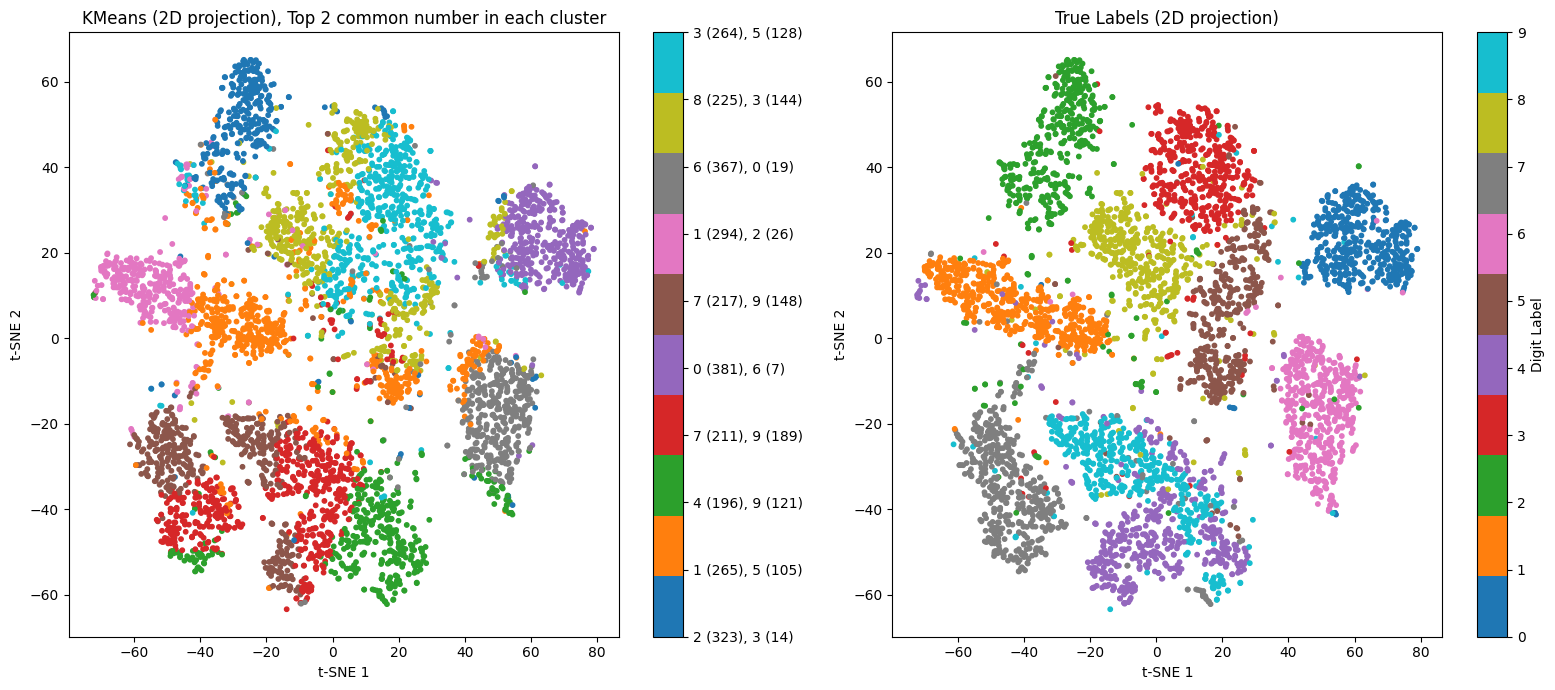

In [ ]:
# ----------------------------
# TODO Implement KMeans
# ----------------------------

k = n_classes

kmeans_rand = KMeans(n_clusters=k, init='random', n_init=10, max_iter=50, random_state=42)
kmeans_rand.fit(X)
labels_km = kmeans_rand.labels_
centroids_km = kmeans_rand.cluster_centers_


# ----------------------------
# Implemenetation ends here
# ----------------------------

# Reduce to 2D for visualization
X_2d = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)


tick_labels = []
for cluster_id in range(k):
    idxs = np.where(labels_km == cluster_id)[0]
    true_labels = y[idxs]
    if len(true_labels) > 0:
        counts = Counter(true_labels).most_common(2)
        if len(counts) == 1:
            label_str = f"{counts[0][0]} ({counts[0][1]})"
        else:
            label_str = f"{counts[0][0]} ({counts[0][1]}), {counts[1][0]} ({counts[1][1]})"


        tick_labels.append(label_str)
    else:
        tick_labels.append("Empty")


fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Left: KMeans clusters
sc1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_km, cmap="tab10", s=10)
cbar1 = plt.colorbar(sc1, ax=axes[0], ticks=range(k))
cbar1.ax.set_yticklabels(tick_labels)
axes[0].set_title("KMeans (2D projection), Top 2 common number in each cluster")
axes[0].set_xlabel("t-SNE 1")
axes[0].set_ylabel("t-SNE 2")

# Right: True labels
sc2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap="tab10", s=10)
cbar2 = plt.colorbar(sc2, ax=axes[1])
cbar2.set_label("Digit Label")
axes[1].set_title("True Labels (2D projection)")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()


# [TODO]: Find Confused Digit Pairs in Kmeans (1 point)

- For each cluster, check the **second most common true label**.  
- If its count is **greater than 50**, record the pairs (most common, second most common) and write your answer here.

Answer: these pairs
- (3, 5)
- (8, 3)
- (7, 9)
- (4, 9)
- (1, 5)




7, 9 repeat

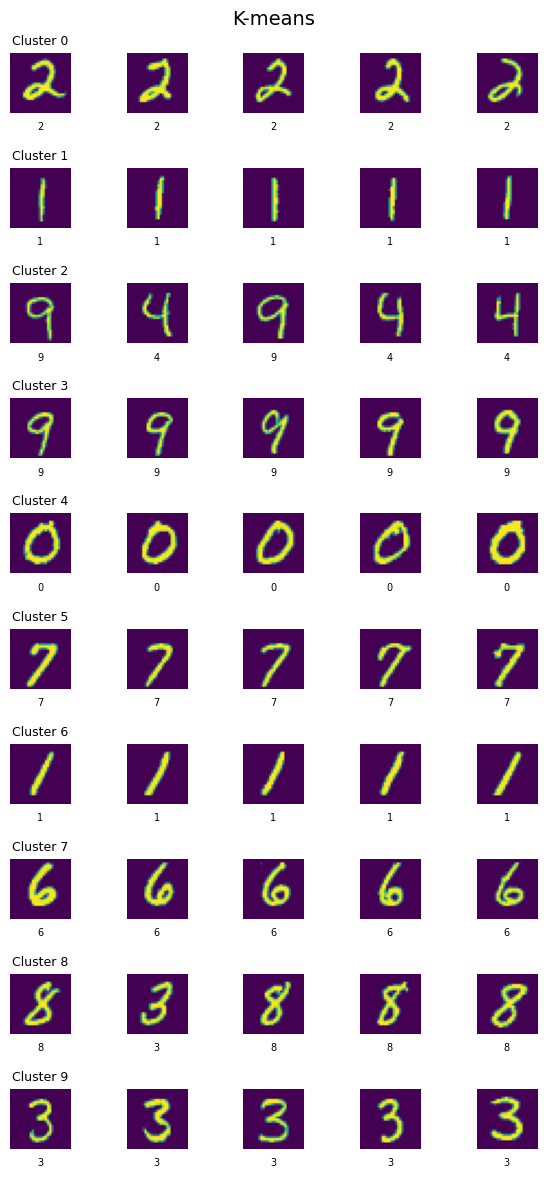

In [ ]:
show_closest_images(X, dataset, centroids_km, labels_km, "K-means")

# [TODO] Implement KMeans++ for MNIST (2 points)

## Instructions

In this section, you will implement **K-means ++** using the **sklearn** library.

- Use the `KMeans` class from `sklearn.cluster`.
- Set the following parameters:
  - `n_clusters = k` (choose based on the dataset what do you think thge right number is for this dataset?).  
  - `init = "?"` what should this be for Kmeans ++ ?.  
  - `n_init = 10` (please set the number of random initializations to 10).  
  - `max_iter = 50` (maximum number of iterations before convergence need to be set to 50).  
  - `random_state = 42` (for reproducibility).  

Note that everywhere you need to use random_state = 42 where ever needed for Kmeans, Kmeans++ and Kmedioids for reproducibility, if you set this to anotehr value **you will not get full score**.

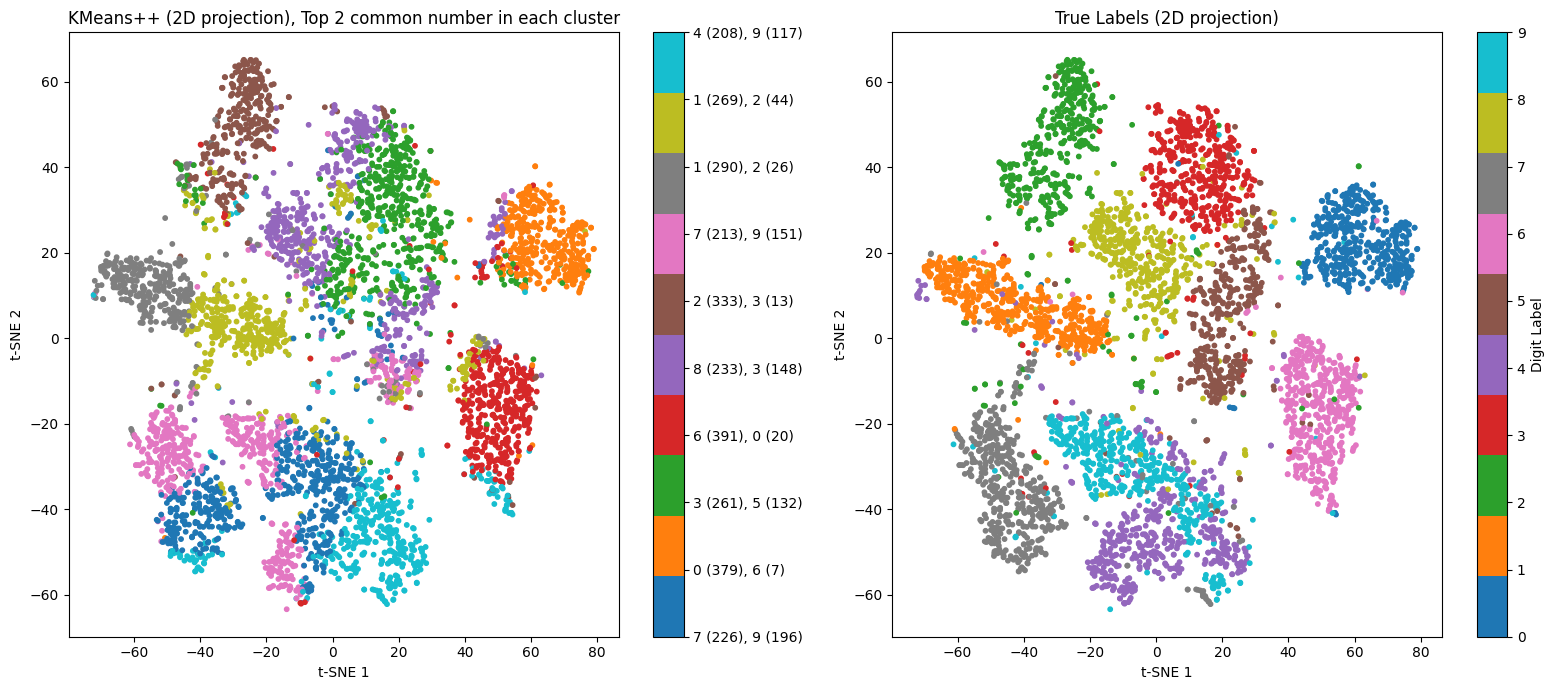

In [ ]:
# ----------------------------
# TODO Implement Kmeans ++
# ----------------------------

kmeans_pp = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=50, random_state=42)
kmeans_pp.fit(X)
labels_pp = kmeans_pp.labels_
centroids_pp = kmeans_pp.cluster_centers_

# ----------------------------
# Implemenetation ends here
# ----------------------------

# Reduce to 2D for visualization
X_2d = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)


tick_labels = []
for cluster_id in range(k):
    idxs = np.where(labels_pp == cluster_id)[0]
    true_labels = y[idxs]
    if len(true_labels) > 0:
        counts = Counter(true_labels).most_common(2)
        if len(counts) == 1:
            label_str = f"{counts[0][0]} ({counts[0][1]})"
        else:
            label_str = f"{counts[0][0]} ({counts[0][1]}), {counts[1][0]} ({counts[1][1]})"
        tick_labels.append(label_str)
    else:
        tick_labels.append("Empty")


fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Left: KMeans clusters
sc1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_pp, cmap="tab10", s=10)
cbar1 = plt.colorbar(sc1, ax=axes[0], ticks=range(k))
cbar1.ax.set_yticklabels(tick_labels)
axes[0].set_title("KMeans++ (2D projection), Top 2 common number in each cluster")
axes[0].set_xlabel("t-SNE 1")
axes[0].set_ylabel("t-SNE 2")

# Right: True labels
sc2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap="tab10", s=10)
cbar2 = plt.colorbar(sc2, ax=axes[1])
cbar2.set_label("Digit Label")
axes[1].set_title("True Labels (2D projection)")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()



# [TODO]: Find Confused Digit Pairs  in Kmeans++ (1 point)

- For each cluster, check the **second most common true label**.  
- If its count is **greater than 50**, record the pair (most common, second most common) and write your answer here.

Answer:
- (4, 9)
- (7, 9)
- (8, 3)
- (3, 5)

(7, 9) again, repeated?

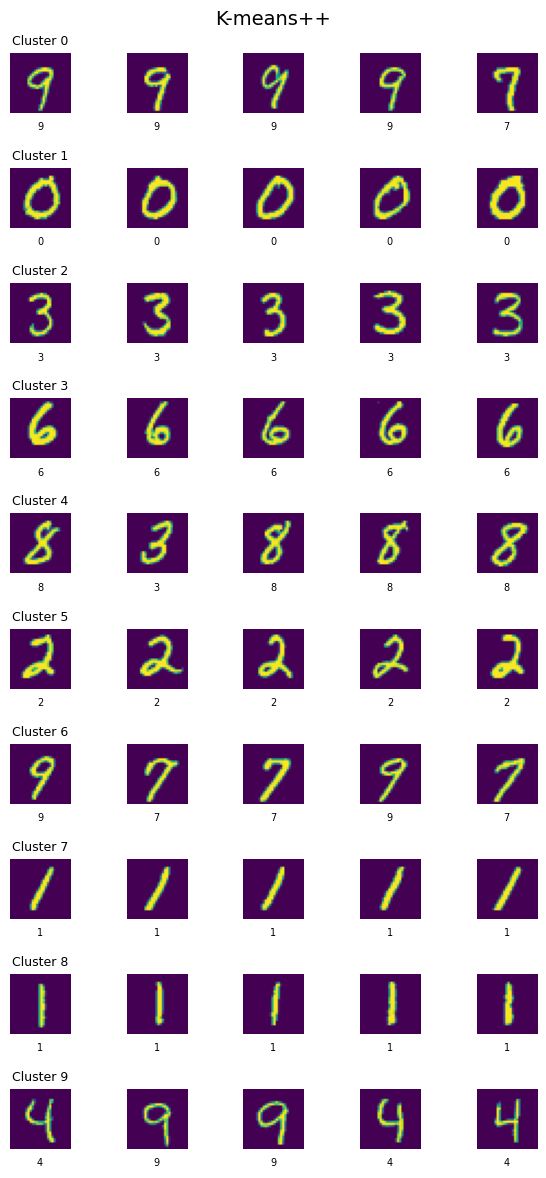

In [ ]:
show_closest_images(X, dataset, centroids_pp, labels_pp, "K-means++")

# [TODO] Implement Kmedioids (2 points)

## Instructions
KMedoids (with `kmedoids` package)

- Use the `KMedoids` class from the **`kmedoids`** package, which you must have pip installed at the start of the notebook.  
- Set the following parameters:
  - `n_clusters = k` → number of clusters (choose based on dataset).  
  - `method = "fasterpam"` → efficient implementation of the PAM algorithm.  
  - `metric = "precomputed"` → pass a precomputed distance matrix.  
  - `random_state = 42` → ensures reproducibility.  
Note that everywhere you need to use random_state = 42 where ever needed for Kmeans, Kmeans++ and Kmedioids for reproducibility, if you set this to anotehr value **you will not get full score**.

Extra Note:  Before running KMedoids, you need to compute a **distance matrix** using e.g.  
  ```python
dist_matrix = pairwise_distances(X, metric="manhattan")



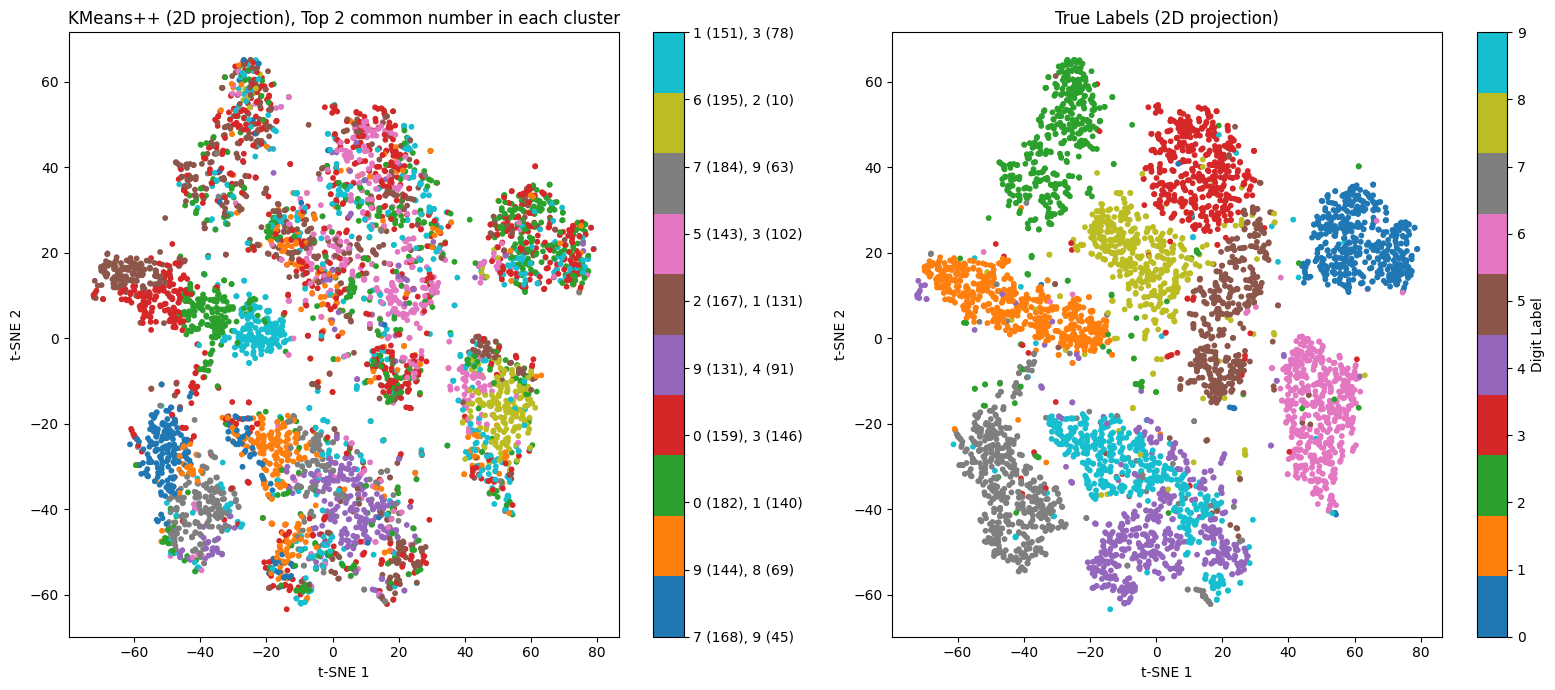

In [ ]:
# -------------------------
# TODO Implement KMedoids
# ------------------------

# Distance matrix from above
dist_matrix = pairwise_distances(X, metric="manhattan")

# KMedoids
kmedoids_model = kmedoids.KMedoids(n_clusters=k, method='fasterpam', metric='precomputed', random_state=42)
kmedoids_model.fit(dist_matrix)

labels_kmed = kmedoids_model.labels_
medoid_indices = kmedoids_model.medoid_indices_
centroids_kmed = X[medoid_indices]


# ----------------------------
# Implementation ends here
# ----------------------------

# Reduce to 2D for visualization
X_2d = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)


tick_labels = []
for cluster_id in range(k):
    idxs = np.where(labels_kmed == cluster_id)[0]
    true_labels = y[idxs]
    if len(true_labels) > 0:
        counts = Counter(true_labels).most_common(2)
        if len(counts) == 1:
            label_str = f"{counts[0][0]} ({counts[0][1]})"
        else:
            label_str = f"{counts[0][0]} ({counts[0][1]}), {counts[1][0]} ({counts[1][1]})"
        tick_labels.append(label_str)
    else:
        tick_labels.append("Empty")


fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Left: KMeans clusters
sc1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_kmed, cmap="tab10", s=10)
cbar1 = plt.colorbar(sc1, ax=axes[0], ticks=range(k))
cbar1.ax.set_yticklabels(tick_labels)
axes[0].set_title("KMeans++ (2D projection), Top 2 common number in each cluster")
axes[0].set_xlabel("t-SNE 1")
axes[0].set_ylabel("t-SNE 2")

# Right: True labels
sc2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap="tab10", s=10)
cbar2 = plt.colorbar(sc2, ax=axes[1])
cbar2.set_label("Digit Label")
axes[1].set_title("True Labels (2D projection)")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()




# [TODO] Find Confused Digit Pairs  in Kmedioids (1 point)

- For each cluster, check the **second most common true label**.  
- If its count is **greater than 50**, record the pair (most common, second most common) and write your answer here.

Answer:
- (1, 3)
- (7, 9)
- (5, 3)
- (2, 1)
- (9, 4)
- (0, 3)
- (0, 1)
- (9, 8)


# [TODO] Compute Silhouette scores for MNIST (2 points)

In [ ]:
# -------------------------------------------------------------------------------------
# TODO Implement Metrics: Compute Silhouette scores for Kmeans, Kmeans++ and Kmedioids
# --------------------------------------------------------------------------------------

sil_km_rand = silhouette_score(X, labels_km)
sil_km_pp = silhouette_score(X, labels_pp)
sil_kmed = silhouette_score(dist_matrix, labels_kmed, metric='precomputed')


# ----------------------------
# Implemenetation ends here
# ----------------------------

results = pd.DataFrame({
    "Algorithm": ["KMeans", "KMeans++", "KMedoids"],
    "Silhouette Score": [sil_km_rand, sil_km_pp, sil_kmed]
})
results

Algorithm  Silhouette Score
0    KMeans          0.071394
1  KMeans++          0.069799
2  KMedoids          0.004066

# [TODO] Using the Silhouette scores answer which method is doing better? (1 point)


Answer:
KMeans with random initialization is doing better on the MNIST dataset because its got a higher score (0.071394).

# Clustering a pixels in a Single Image

## [TODO] Image Clustering with KMeans and KMeans++ (2 points)

In this exercise, you will explore how clustering can be applied to images.  
Instead of clustering entire datasets, we cluster the **pixels** of an image based on their RGB values.  

Instructions for Kmeans:

- Use the `KMeans` class from `sklearn.cluster`.
- Set the following parameters:
  - `n_clusters = k` (set this to 5).  
  - `init = "?"` what should this be for Kmeans?.  
  - `n_init = 10` (please set the number of random initializations to 10).  
  - `max_iter = 50` (maximum number of iterations before convergence need to be set to 50).  
  - `random_state = 42` (for reproducibility).  

Instructions for Kmeans ++

- Use the `KMeans` class from `sklearn.cluster`.
- Set the following parameters:
  - `n_clusters = k` (choose based on the dataset what do you think thge right number is for this dataset?).  
  - `init = "?"` what should this be for Kmeans ++ ?.  
  - `n_init = 10` (please set the number of random initializations to 10).  
  - `max_iter = 50` (maximum number of iterations before convergence need to be set to 50).  
  - `random_state = 42` (for reproducibility).

Note that everywhere you need to use random_state = 42 where ever needed for Kmeans, Kmeans++ and Kmedioids for reproducibility, if you set this to another value **you will not get full score**.

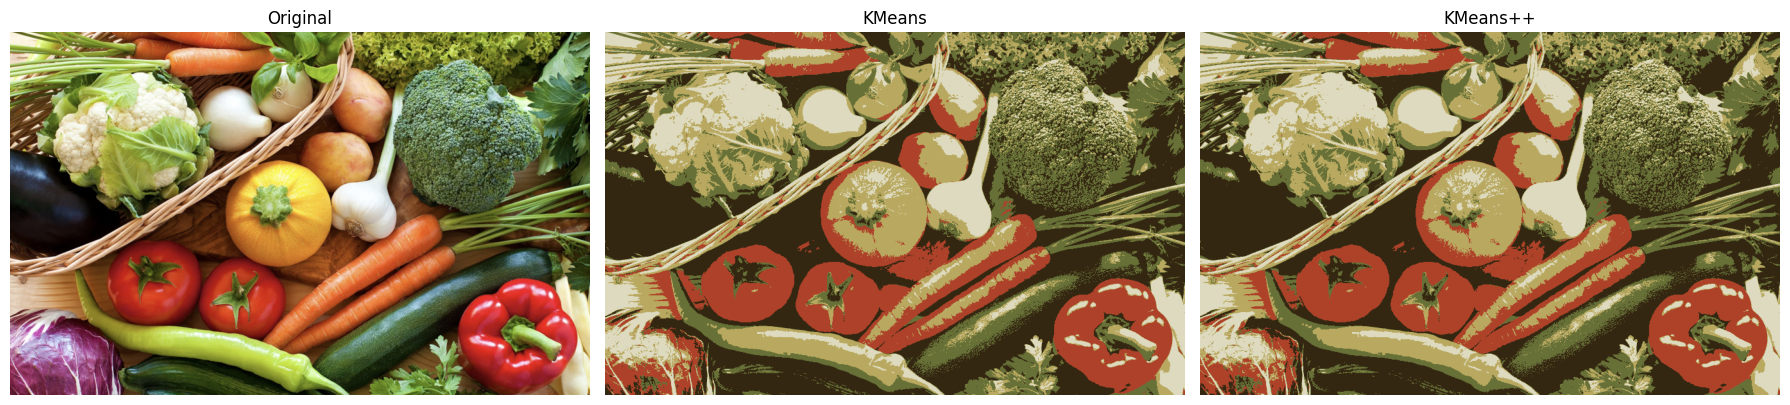

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from skimage.io import imread
from skimage.transform import rescale
import kmedoids


image = imread("image0.png")
image = rescale(image, 0.5, channel_axis=-1)

image_shape = image.shape
pixels = image.reshape(-1, image_shape[-1])

# ------------------------------------------------------------
# TODO Implement KMeans
# ------------------------------------------------------------
k_image = 5
kmeans_image_rand = KMeans(n_clusters=k_image, init='random', n_init=10, max_iter=50, random_state=42)
kmeans_image_rand.fit(pixels)
quantized_rand = kmeans_image_rand.cluster_centers_[kmeans_image_rand.labels_].reshape(image_shape)


# ------------------------------------------------------------
# TODO KMeans++
# ------------------------------------------------------------
kmeans_image_pp = KMeans(n_clusters=k_image, init='k-means++', n_init=10, max_iter=50, random_state=42)
kmeans_image_pp.fit(pixels)
quantized_pp = kmeans_image_pp.cluster_centers_[kmeans_image_pp.labels_].reshape(image_shape)


# ------------------------------------------------------------
# Implementation Ends here
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(quantized_rand)
axes[1].set_title("KMeans")
axes[1].axis("off")

axes[2].imshow(quantized_pp)
axes[2].set_title("KMeans++")
axes[2].axis("off")


plt.tight_layout()
plt.show()





## [TODO] Image Clustering (Instructions) (10 points)
1. Load each of the three images which should be given to you (image1.jpg, image2.jpg, image3.jpg)
2. For each image, apply **KMeans clustering** twice:  
   - **KMeans (Random Init)**  
   - **KMeans++ (Smart Init)**  
3. Replace each pixel with the color of its cluster centroid.  
   - This reduces the number of unique colors in the image.  
   - The result is a “posterized” image with simplified colors.  
4. Display the results in a **3×3 grid**:  
   - **Column 1** → Original images.  
   - **Column 2** → KMeans results.  
   - **Column 3** → KMeans++ results.  

You need to get the output as follows:
- A single figure with 9 panels (3 rows × 3 columns).  
- Each row corresponds to one image.  
- The leftmost image in each row is the original, followed by its KMeans and KMeans++ clustered versions.  
---


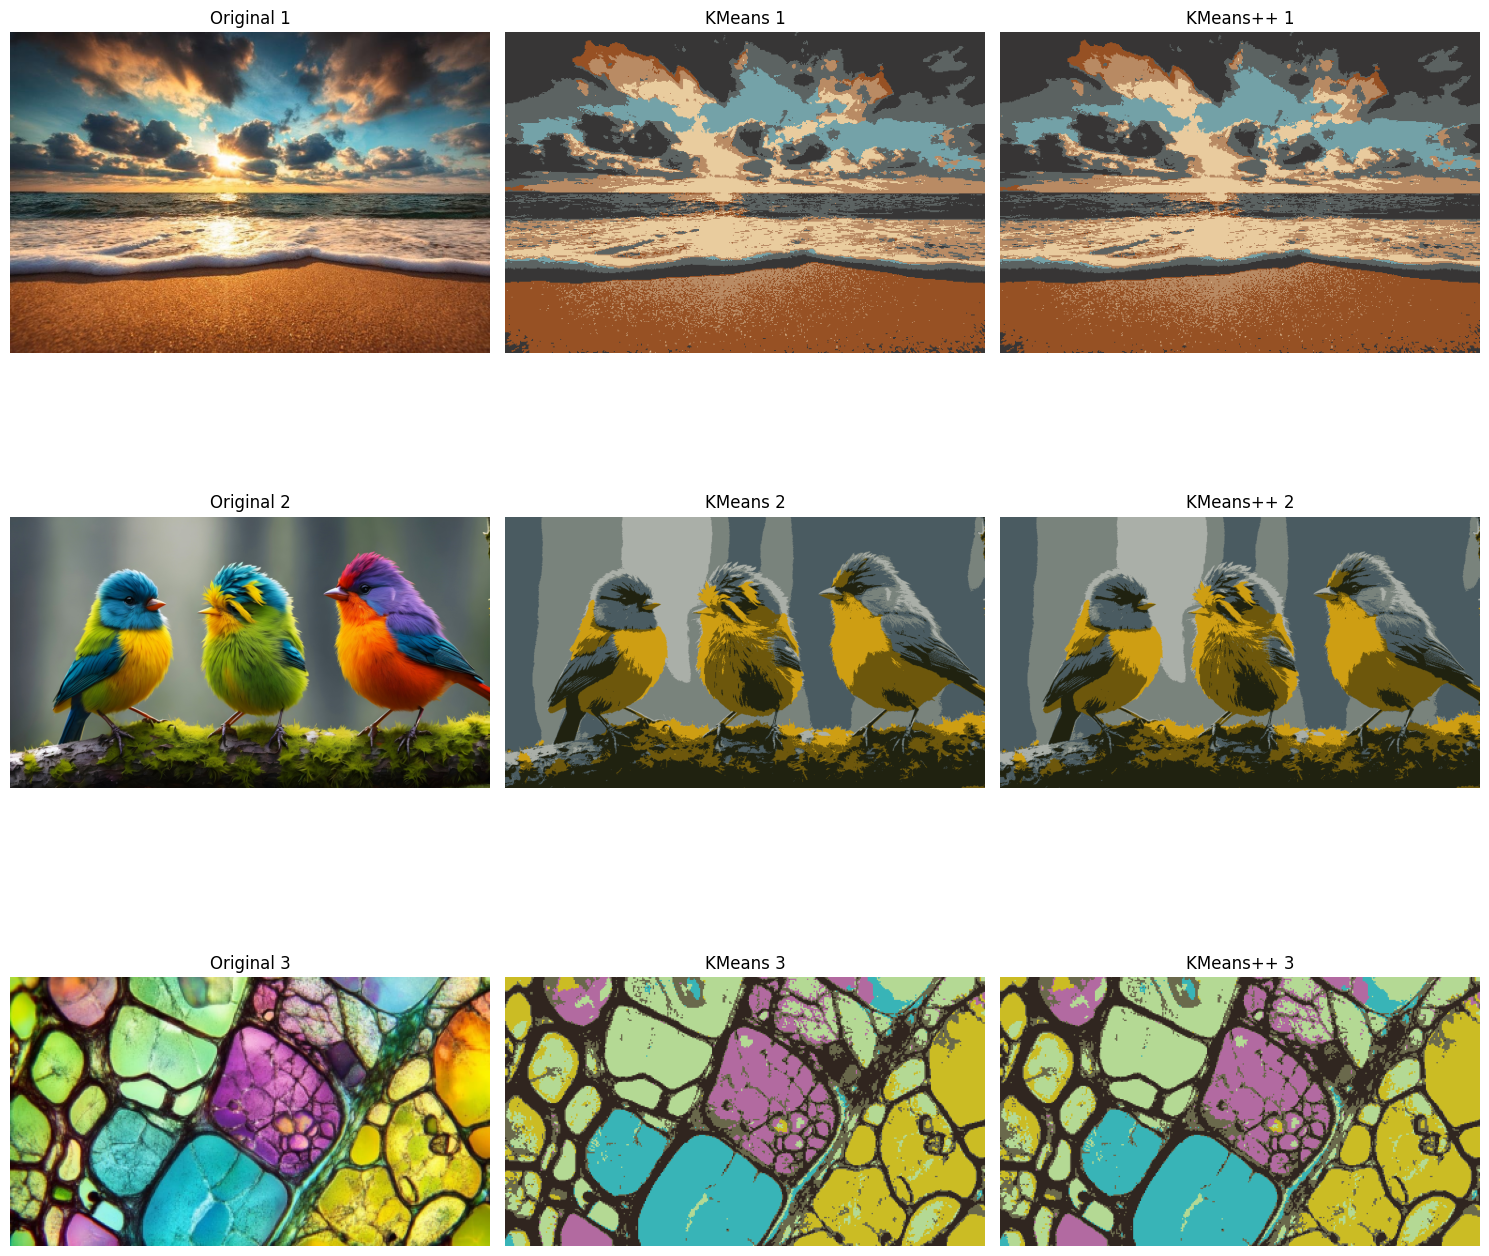

In [ ]:
def cluster_image(image_path, k=5):
    image = imread(image_path)
    image = rescale(image, 0.5, channel_axis=-1)
    h, w, c = image.shape
    pixels = image.reshape(-1, c)


    # ----------------------------------------------
    # Implement Kmeans
    # ----------------------------------------------
    kmeans_image_rand = KMeans(n_clusters=k, init='random', n_init=10, max_iter=50, random_state=42)
    kmeans_image_rand.fit(pixels)
    quantized_rand = kmeans_image_rand.cluster_centers_[kmeans_image_rand.labels_].reshape(image.shape)


    # ----------------------------------------------
    # Implement Kmeans ++
    # ----------------------------------------------
    kmeans_image_pp = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=50, random_state=42)
    kmeans_image_pp.fit(pixels)
    quantized_pp = kmeans_image_pp.cluster_centers_[kmeans_image_pp.labels_].reshape(image.shape)


    # ----------------------------------------------
    # Implementation ends here
    # ----------------------------------------------

    return image, quantized_rand, quantized_pp


images = ["image1.jpg", "image2.jpg", "image3.jpg"]
results = [cluster_image(img, k=6) for img in images]


fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, (orig, km_rand, km_pp) in enumerate(results):
    axes[i, 0].imshow(orig)
    axes[i, 0].set_title(f"Original {i+1}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(km_rand)
    axes[i, 1].set_title(f"KMeans {i+1}")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(km_pp)
    axes[i, 2].set_title(f"KMeans++ {i+1}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()

# [TODO] Answer the following questions (8 points)

* * *

**1. Question:** What does the Silhouette Score of KMeans++ for MNIST dataset represent?

**Answer:** Measures how similar a data point is to its own cluster compared to other clusters. For KMeans++ on the MNIST dataset, higher score = well-clustered = closer to the centroid of their own cluster than to the centroids of other clusters.

* * *

**2. Question:** When you used the KMeans library you set `n_init = 10`. What does `n_init` do?

**Answer:** Specifies the number of times the KMeans algorithm will be run with different centroid seeds.
Helps to avoid finding bad local minima and helps a better clustering solution.

* * *

**3. Question:** When you used the KMeans library you set `max_iter = 50`. What does `max_iter` do?

**Answer:** Specifies the maximum number of iterations the algorithm will run for a single run.
The algorithm updates the cluster centroids and reassigns data points to the closest centroid. Limits the computation time for each run because its how much it runs

* * *

**4. Question:** What distance metric did you use for computing the Silhouette score of KMedoids?

**Answer:** A precomputed Manhattan distance matrix.

* * *